# End to End Time Series forecasting using ARIMA

### 1 Import Libraries

In [73]:
# Data and package Import
# Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA


## 2 Load Dataset

In [17]:
TempData = pd.read_csv('HCLTECH.csv')
TempData.tail(5)

Date   Symbol Series  Prev Close    Open    High     Low    Last  \
5163  2020-10-12  HCLTECH     EQ      855.75  860.80  871.95  857.15  866.20   
5164  2020-10-13  HCLTECH     EQ      865.80  866.30  906.60  863.30  900.90   
5165  2020-10-14  HCLTECH     EQ      900.40  904.00  910.70  882.00  887.00   
5166  2020-10-15  HCLTECH     EQ      890.45  899.95  903.70  833.45  863.45   
5167  2020-10-16  HCLTECH     EQ      860.00  859.00  877.00  820.60  830.05   
5168  2020-10-19  HCLTECH     EQ      827.15  839.80  861.70  833.00  846.95   
5169  2020-10-20  HCLTECH     EQ      844.75  846.95  886.00  843.60  881.00   
5170  2020-10-21  HCLTECH     EQ      879.65  881.00  891.65  860.00  866.00   
5171  2020-10-22  HCLTECH     EQ      871.05  858.90  878.00  851.55  866.00   
5172  2020-10-23  HCLTECH     EQ      866.25  871.00  875.45  850.60  852.50   
5173  2020-10-26  HCLTECH     EQ      852.45  853.00  860.90  842.05  847.45   
5174  2020-10-27  HCLTECH     EQ      847.80  848.95  857.45  838.70  850.00   
5175  2020-10-28  HCLTECH     EQ      847.25  852.00  852.00  821.60  829.90   
5176  2020-10-29  HCLTECH     EQ      829.60  825.00  842.50  818.95  836.40   
5177  2020-10-30  HCLTECH     EQ      840.05  842.80  859.70  833.00  844.75   
5178  2020-11-02  HCLTECH     EQ      841.95  841.95  843.85  819.20  822.15   
5179  2020-11-03  HCLTECH     EQ      822.40  828.00  832.00  812.35  813.50   
5180  2020-11-04  HCLTECH     EQ      814.05  812.20  841.75  810.60  817.95   
5181  2020-11-05  HCLTECH     EQ      815.15  834.00  851.10  830.05  845.00   
5182  2020-11-06  HCLTECH     EQ      842.90  846.00  855.80  836.40  854.80   
5183  2020-11-09  HCLTECH     EQ      850.10  866.80  872.80  847.10  858.95   
5184  2020-11-10  HCLTECH     EQ      855.00  848.50  848.50  805.75  812.15   
5185  2020-11-11  HCLTECH     EQ      809.70  813.00  829.00  805.35  827.00   
5186  2020-11-12  HCLTECH     EQ      826.05  827.15  837.00  822.00  824.80   
5187  2020-11-13  HCLTECH     EQ      824.70  822.90  831.45  818.15  827.85   
5188  2020-11-14  HCLTECH     EQ      828.10  834.00  834.00  829.00  830.50   
5189  2020-11-17  HCLTECH     EQ      830.50  837.95  837.95  814.00  816.20   
5190  2020-11-18  HCLTECH     EQ      815.00  819.00  819.90  800.25  814.00   
5191  2020-11-19  HCLTECH     EQ      814.30  815.00  820.45  803.00  804.60   
5192  2020-11-20  HCLTECH     EQ      804.55  813.95  823.50  804.00  820.00   
5193  2020-11-23  HCLTECH     EQ      819.25  825.00  842.00  816.25  838.50   
5194  2020-11-24  HCLTECH     EQ      839.20  843.90  857.40  835.35  841.00   
5195  2020-11-25  HCLTECH     EQ      840.50  840.50  846.00  822.50  825.00   
5196  2020-11-26  HCLTECH     EQ      824.70  824.10  845.00  819.60  841.20   
5197  2020-11-27  HCLTECH     EQ      842.05  842.00  847.80  814.35  823.15   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
5163  865.80  864.97   8717565  7.540451e+14  117629.0           3622810.0   
5164  900.40  892.77  18948688  1.691681e+15  230425.0           3777633.0   
5165  890.45  893.40  15441223  1.379523e+15  191846.0           4692865.0   
5166  860.00  864.00  15648849  1.352065e+15  233161.0           3534511.0   
5167  827.15  836.13  28983265  2.423376e+15  413675.0           4612604.0   
5168  844.75  848.30  15671737  1.329427e+15  258268.0           3766826.0   
5169  879.65  875.71  21564064  1.888383e+15  291297.0           5543370.0   
5170  871.05  874.89  11162084  9.765639e+14  155501.0           2598830.0   
5171  866.25  866.76   9607800  8.327620e+14  168926.0           3455330.0   
5172  852.45  860.30   5447502  4.686496e+14  115601.0           1678794.0   
5173  847.80  852.83   6614014  5.640636e+14  120624.0           1935295.0   
5174  847.25  846.32   5807905  4.915324e+14  109755.0           2185781.0   
5175  829.60  833.36   6853043  5.711055e+14  139980.0           2092608.0   
5176  840.05  833.08   6691023  5.57415

In [9]:
TempData.shape

(5198, 15)

In [11]:
TempData.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2844
Deliverable Volume     503
%Deliverble            503
dtype: int64

In [13]:
TempData.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [19]:
#Data Cleaning
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

In [21]:
HCLTechStockData.dtypes

dtype('float64')

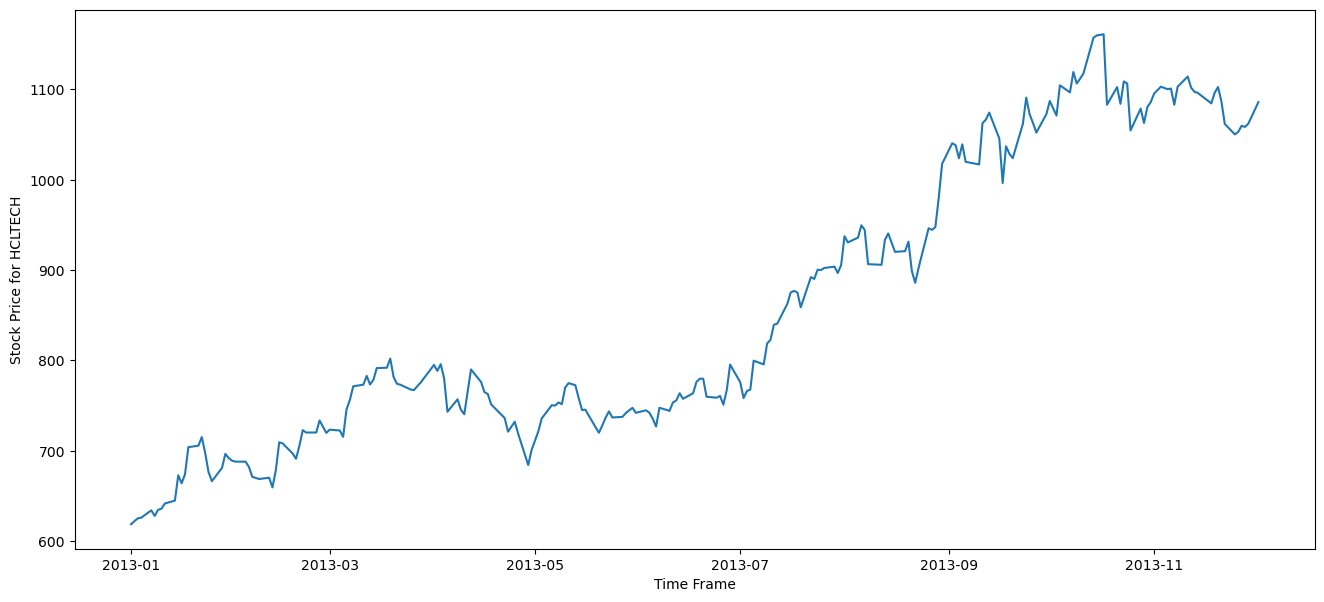

In [23]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

In [ ]:
# Checking stationarity

In [ ]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

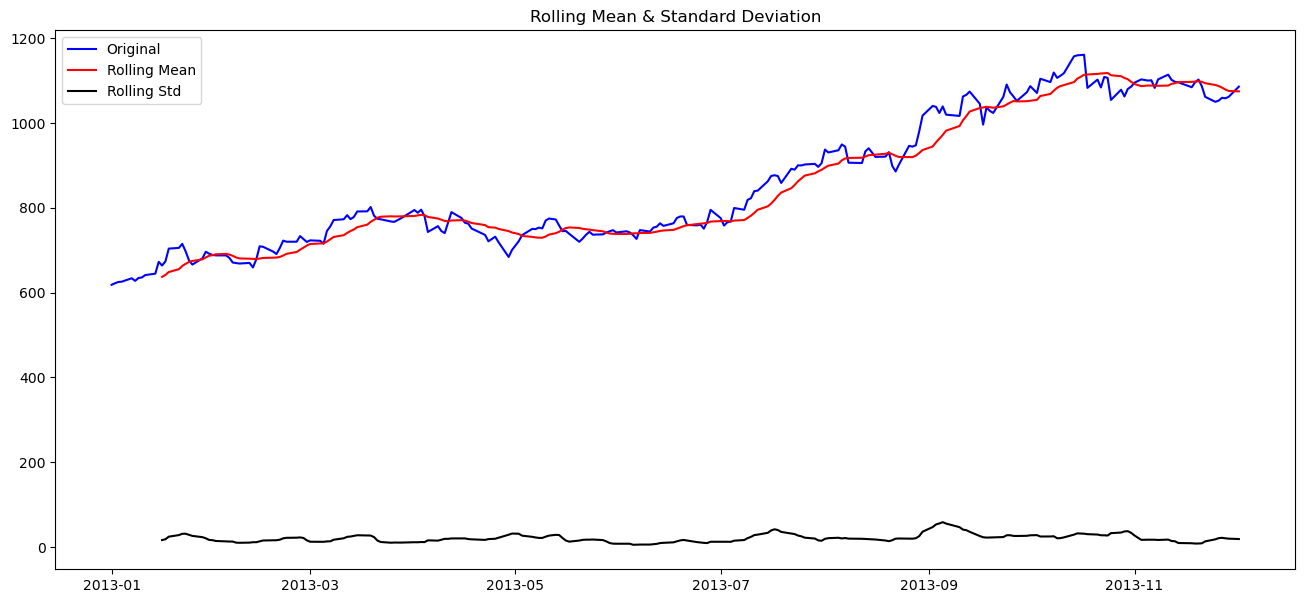

In [25]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean() # 12 entries
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

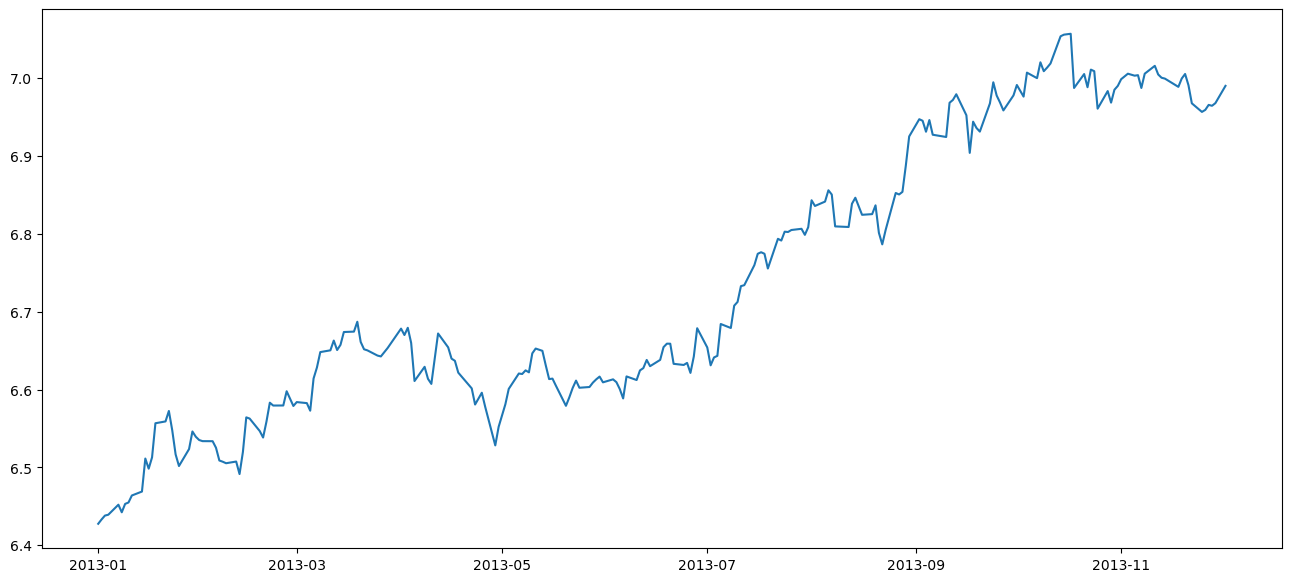

In [27]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)#to transform to stationary from non-stationary
plt.plot(ts_log)

In [ ]:
# Observation: even after doing log transformation, it is not becoming stationary. So we try to decompose
# into seasonal component

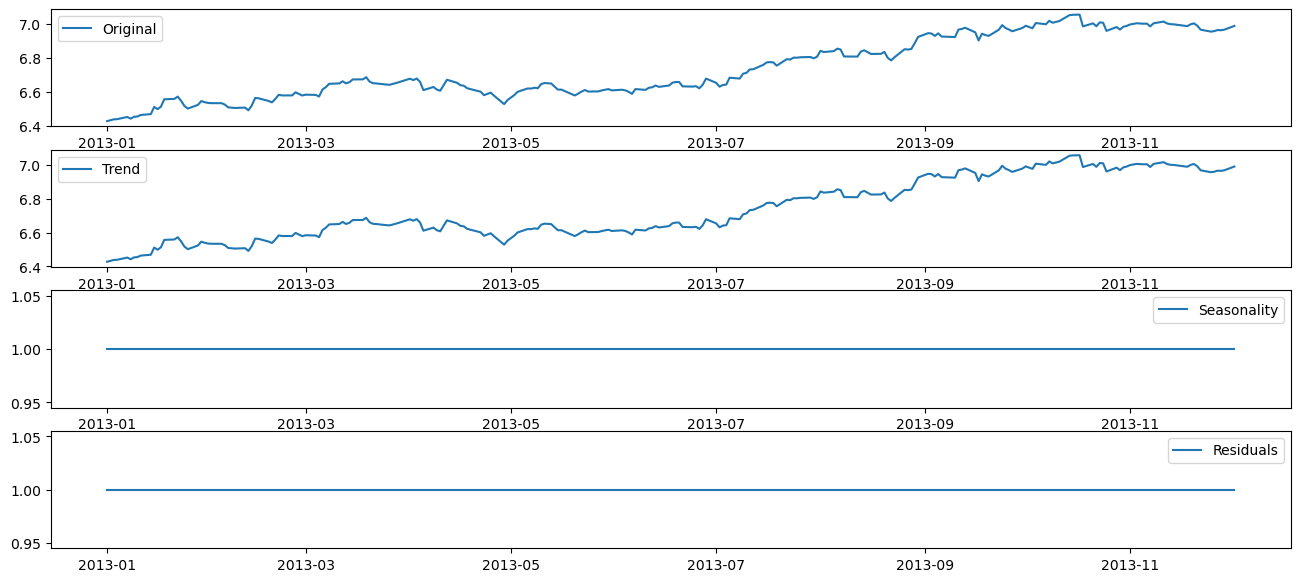

In [31]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [ ]:
# Trend component is contributing more to the time series.
# We have tried log transformation. but TS is not becoming stationary. So we try to create a differenced TS.
# Differencing? I will shift the time series by 1 and subtract from the original TS. 

In [ ]:
# Why differncing? So that I can expect a stationarity in my TS.

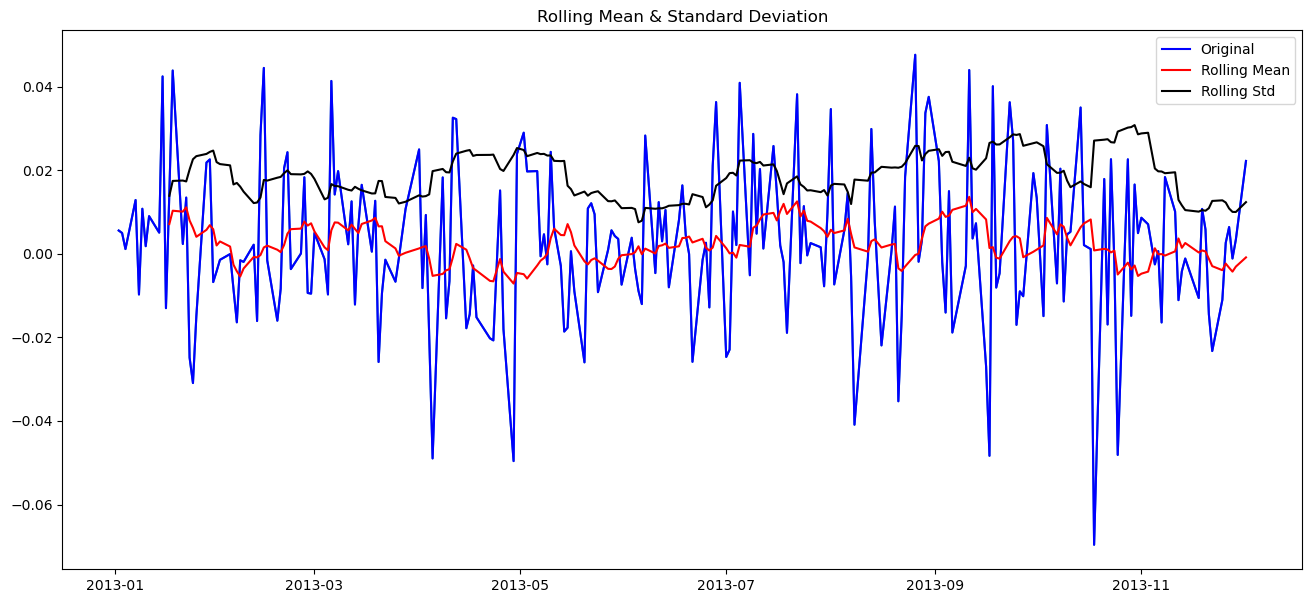

In [33]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift() # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# Obsevation: After differnecing, there is no pattern in the mean. No upward trend.
#So, by the definition of stationarity, if I take a mean between 03-2013 and 05-2013, and 09-2013 and 11-2013,
#the mean and SD would almost similar. There wont be much differences.

In [ ]:
# Why all the hard work of log transformation, square root and differencing? Because we want our TS to be stationary or else or model 
# will  never forecast well.

In [35]:
HCLTechStockData.sort_index(inplace= True)

In [ ]:
#After this we want to know what should be the order of AR component and MA component because we dont know by hand, what order suits better for our model. So perform ACF and PACF.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

C:\Users\X1 Yoga\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


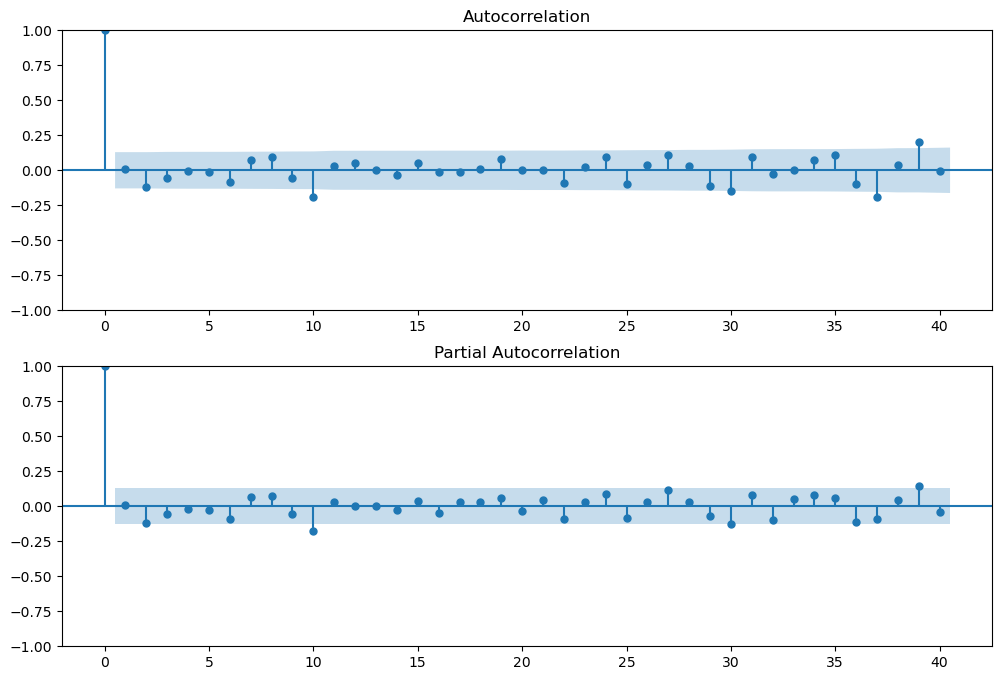

In [37]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
#Blue shaded line is CI. The 1st line crosses this blue line, is the order we want.

In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
type(ts_log_diff)

pandas.core.series.Series

In [55]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

C:\Users\DS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


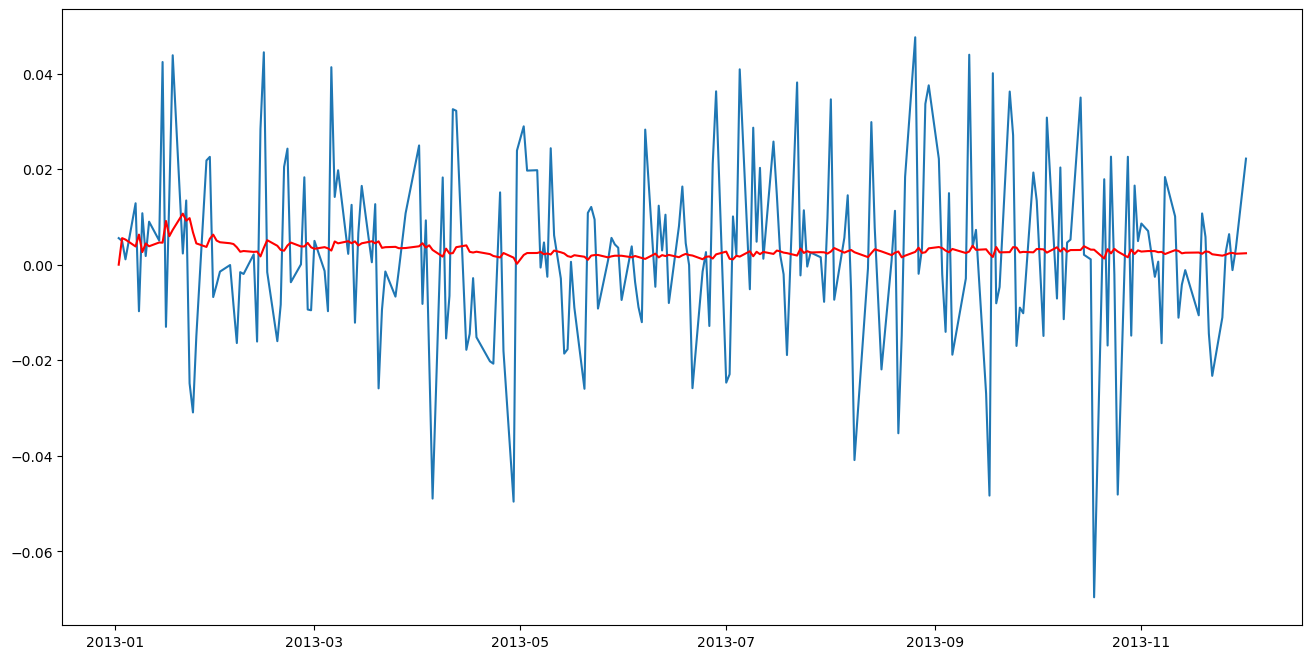

In [57]:
plt.figure(figsize=(16,8))
ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(0,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [ ]:
#Youll notice Red line - actual line is scaled and differenced. And you have do the same for the orginal data as well.

# Taking results back to original scale

In [63]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005259
2013-01-07    0.003817
2013-01-08    0.006302
dtype: float64


In [65]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head()) #2. Why cum sum? Because have taken the difference of our time series.

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010820
2013-01-07    0.014637
2013-01-08    0.020939
dtype: float64


In [67]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)#3. This addition is to compemsate for the differencing we did.
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438440
2013-01-07    6.442258
dtype: float64

Text(0.5, 1.0, 'RMSE: 95.0167')

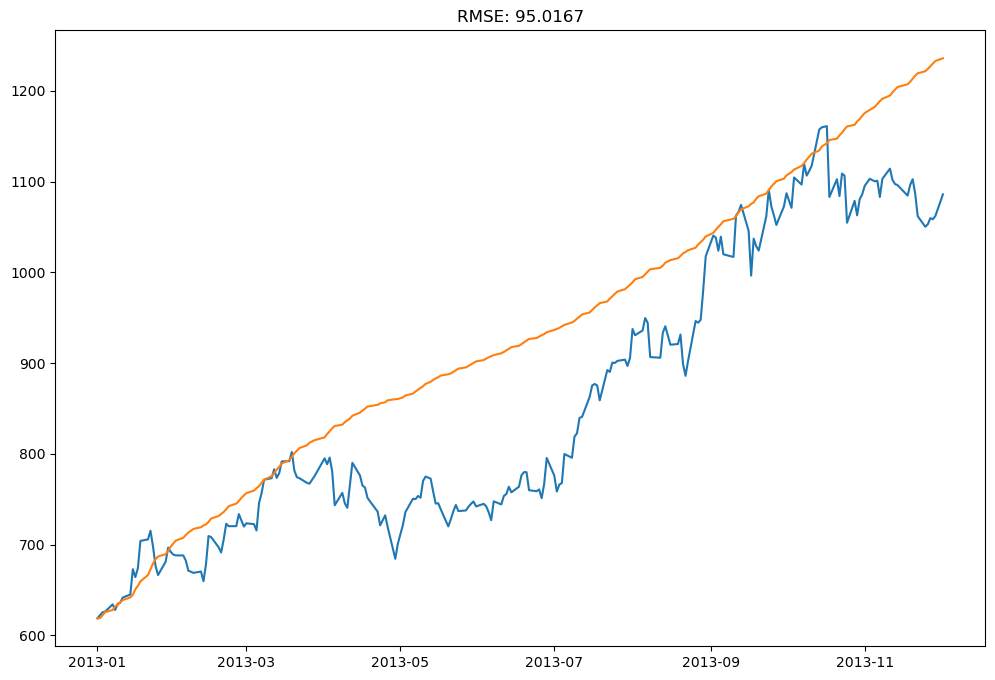

In [69]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction) #4. Why exp? BEcause that's the opposite of log.
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [ ]:
#Blue line is the actual value and orange line is the predicted values.
#Observations: The predicted one is not actualy capturing the complte properties of actual fluctions. Becasue we have choosen some random p,d and q.

In [ ]:
results_ARIMA.predict(10,20) #From index no10 to index20, I want to predict. and these are the results.

Date
2013-01-15    0.001398
2013-01-16    0.001704
2013-01-17   -0.002997
2013-01-18    0.001599
2013-01-21   -0.000306
2013-01-22   -0.004052
2013-01-23   -0.001140
2013-01-24   -0.001885
2013-01-25    0.002912
2013-01-28    0.005861
2013-01-29    0.006330
dtype: float64

In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [ ]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1158.020, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.629 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)